# Medical Cost Predictions

## Introduction

Healthcare costs have become a significant concern, driven by numerous factors such as age, lifestyle choices, and regional variations. Understanding the drivers behind medical insurance charges is essential for both policy-makers and insurers to develop better pricing models and provide affordable care. 

In this project, I will explored the factors influencing individual medical insurance charges using a dataset containig demographic, health and regional information. 

Through this project, the goal is to gain insights into the factors driving medical insurance charges. 

##  About the Dataset

The dataset contains 1,338 observations and seven variables. 

Below is a detailed description of the dataset columns: 

* age: The age of the primary beneficiary, representing individuals across a wide age range, from 18 to 64 years.

* sex: The gender of the insurance contractor, categorized as either female or male.
  
* bmi: Body Mass Index (BMI), a measure of body weight relative to height, calculated as weight (kg) divided by height (m²). It serves as an indicator of whether a person’s weight is within a healthy range, with an ideal BMI falling between 18.5 and 24.9.

* children: The number of children or dependents covered under the insurance policy.

* smoker: A binary variable indicating whether the individual is a smoker ("yes") or a non-smoker ("no").

* region: The residential region of the beneficiary within the United States, categorized as northeast, southeast, southwest, or northwest.

* charges: The dependent variable in this analysis, representing the individual medical costs billed by health insurance, measured in dollars.

## Research Question and Approach

The primary research question for this project is: 

**What factors significantly influence individual medical insurance charges, and how accurately can these costs be predicted using a linear regression model?**

I will approach this question in 5 parts. 

1. Exploring and Refining the Dataset
2. Exploratory Data Analysis and Visualization
3. Linear Regression Model
4. Model Performance
5. Testing the Model



## Part 1: Exploring and Refining the Dataset

In [26]:
# Loading packages 


library(tidyverse)
library(ggthemes)
library(relaimpo)
library(Hmisc)
library(cowplot)
library(WVPlots)
library(patchwork)
library(knitr)
library(readr)
library(dplyr)
library(magrittr)
library(tidyr)
library(gt)
library(forcats)
library(stringr)
library(dslabs)
library(ggplot2)
library(viridis)
library(scales)
library(tidyverse)
set.seed(123)


In [27]:
Data <- read.csv("/kaggle/input/insurance/insurance.csv")

In [28]:
head(Data)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


In [29]:
#Checking for Missing Values
sum(is.na(Data))

[1] 0

As seen above, there are no missing values in this dataset. 

In [30]:
str(Data)

'data.frame':	1338 obs. of  7 variables:
 $ age     : int  19 18 28 33 32 31 46 37 37 60 ...
 $ sex     : chr  "female" "male" "male" "male" ...
 $ bmi     : num  27.9 33.8 33 22.7 28.9 ...
 $ children: int  0 1 3 0 0 0 1 3 2 0 ...
 $ smoker  : chr  "yes" "no" "no" "no" ...
 $ region  : chr  "southwest" "southeast" "southeast" "northwest" ...
 $ charges : num  16885 1726 4449 21984 3867 ...


In [31]:
# Descriptive Statistics
summary(Data)

      age            sex                 bmi           children    
 Min.   :18.00   Length:1338        Min.   :15.96   Min.   :0.000  
 1st Qu.:27.00   Class :character   1st Qu.:26.30   1st Qu.:0.000  
 Median :39.00   Mode  :character   Median :30.40   Median :1.000  
 Mean   :39.21                      Mean   :30.66   Mean   :1.095  
 3rd Qu.:51.00                      3rd Qu.:34.69   3rd Qu.:2.000  
 Max.   :64.00                      Max.   :53.13   Max.   :5.000  
    smoker             region             charges     
 Length:1338        Length:1338        Min.   : 1122  
 Class :character   Class :character   1st Qu.: 4740  
 Mode  :character   Mode  :character   Median : 9382  
                                       Mean   :13270  
                                       3rd Qu.:16640  
                                       Max.   :63770  

For our numerical values: 

The respondents’ gender and region of origin are evenly distributed, with ages spanning from 18 to 64 years. Non-smokers significantly outnumber smokers at a ratio of approximately 4 to 1. The average number of children per respondent is 1, with a maximum of 5 children reported. The average Body Mass Index (BMI) is 30.66, indicating that many respondents may fall in the overweight category. Medical costs vary widely, with an average cost of USD 13,270 and a median cost of USD 9,382.


For our categorical values: 

All categorical values (Sex, Smoker, Region) have 1,338 observations. 





## Part 2: Exploratory Data Analysis and Visualization

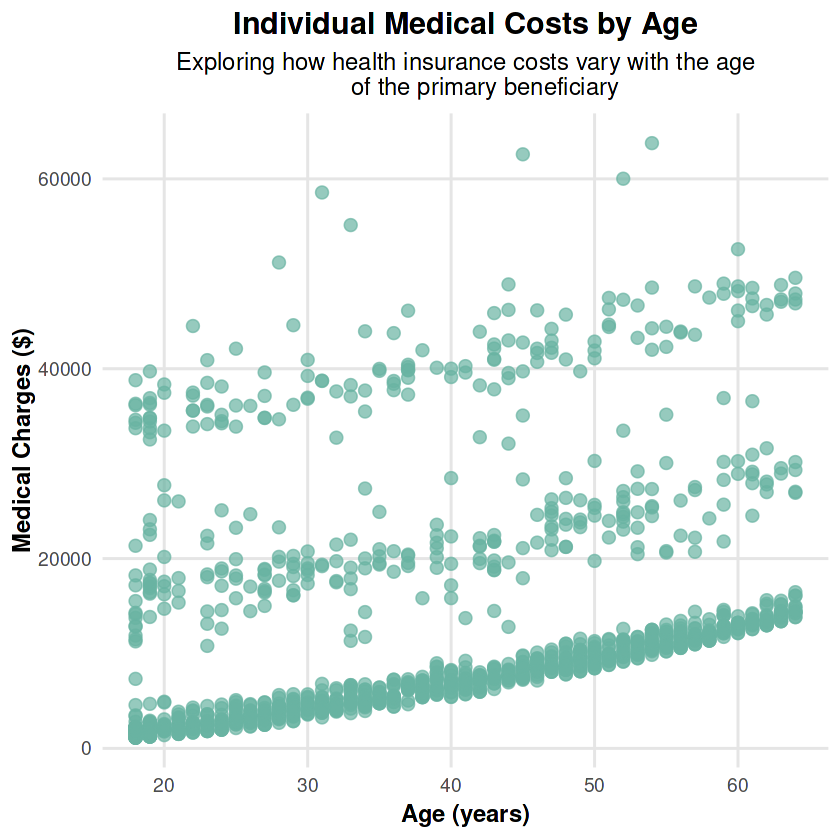

In [32]:
# Age and Cost 
ggplot(Data, aes(x = age, y = charges)) +
  geom_point(alpha = 0.7, size = 3, color = "#69b3a2") + 
  labs(
    title = "Individual Medical Costs by Age",
    subtitle = "Exploring how health insurance costs vary with the age
      of the primary beneficiary",
    x = "Age (years)",
    y = "Medical Charges ($)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5),
    plot.subtitle = element_text(size = 14, hjust = 0.5),
    axis.title = element_text(face = "bold"),
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )


As shown in the graph, while medical charges generally increase with age, there is significant variabiliy across all age groups. Some individuals incur extremely high charges, creating visible outliers, particularly in the middle-aged and older groups. This suggests that factors beyond age, such as health conditions or lifestyle, may significantly influence medical costs.

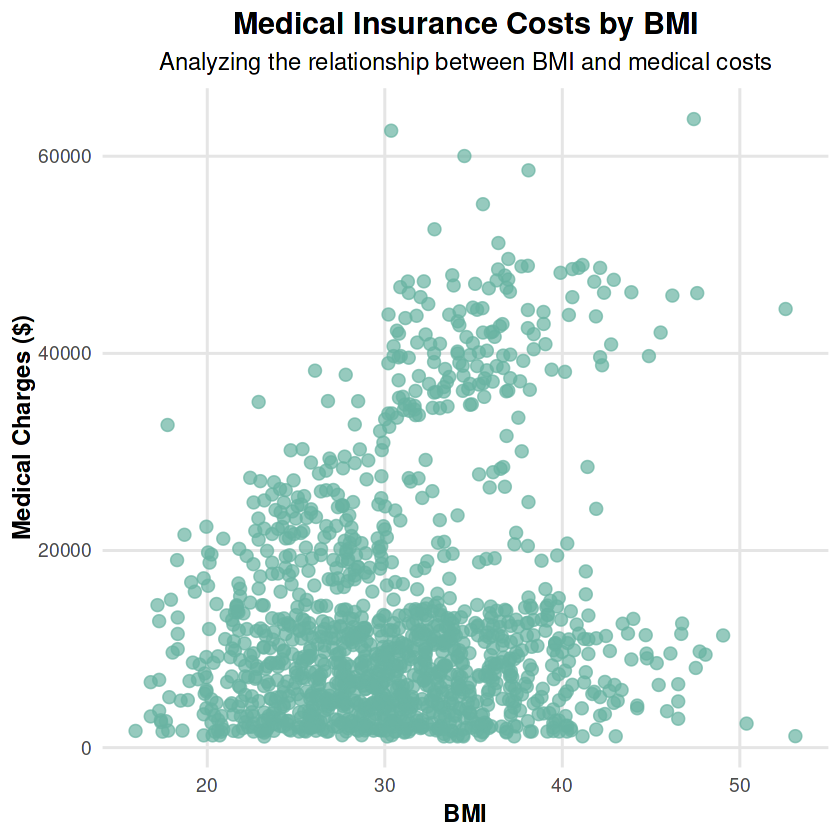

In [33]:
# BMI and Cost 

ggplot(Data, aes(x = bmi, y = charges)) +
  geom_point(alpha = 0.7, size = 3, color = "#69b3a2") + 
  labs(
    title = "Medical Insurance Costs by BMI",
    subtitle = "Analyzing the relationship between BMI and medical costs",
    x = "BMI",
    y = "Medical Charges ($)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5),
    plot.subtitle = element_text(size = 14, hjust = 0.5),
    axis.title = element_text(face = "bold"),
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )


This graph shows that while individuals with higher BMIs tend to incur higher medical costs, the relationship is not consistent, as there is variability in charges across all BMI levels. Notably, a small group of individuals with BMIs around 30-40 have significantly higher medical expenses. 

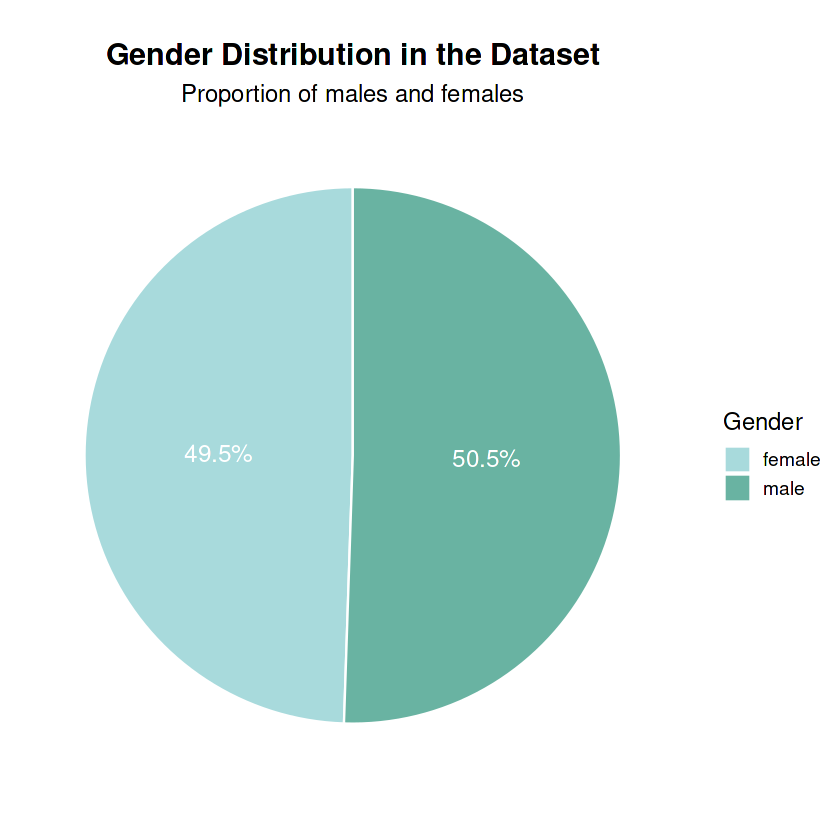

In [34]:
# Gender distribution 

# Counts for each gender category
gender_counts <- Data %>%
  group_by(sex) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Create pie chart
ggplot(gender_counts, aes(x = "", y = percentage, fill = sex)) +
  geom_col(width = 1, color = "white") + # Creates the "pie slices"
  coord_polar(theta = "y") + # Converts bar chart into a pie chart
  geom_text(aes(label = paste0(round(percentage, 1), "%")), # Add percentages as labels
            position = position_stack(vjust = 0.5), size = 5, color = "white") +
  labs(
    title = "Gender Distribution in the Dataset",
    subtitle = "Proportion of males and females",
    fill = "Gender"
  ) +
  scale_fill_manual(values = c("male" = "#69b3a2", "female" = "#a8dadc")) + # Teal shades
  theme_minimal(base_size = 14) +
  theme(
    axis.title = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5),
    plot.subtitle = element_text(size = 14, hjust = 0.5)
  )

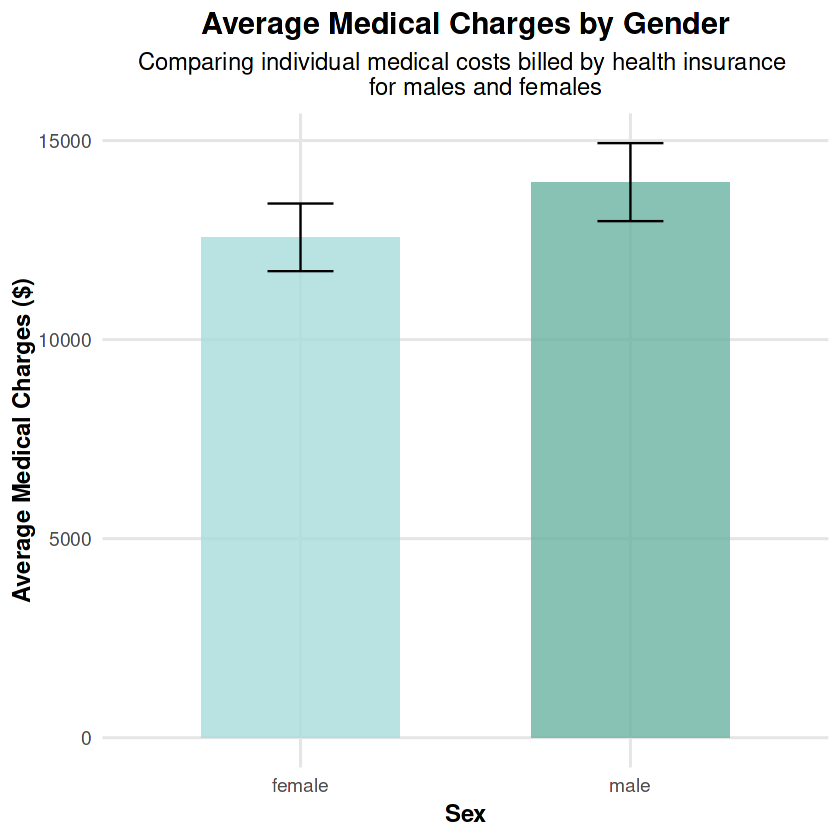

In [35]:
# Sex and Cost 

ggplot(Data, aes(x = sex, y = charges, fill = sex)) +
  stat_summary(fun = mean, geom = "bar", width = 0.6, alpha = 0.8) + # Bar graph of mean charges
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar", width = 0.2, color = "black") + # Error bars
  labs(
    title = "Average Medical Charges by Gender",
    subtitle = "Comparing individual medical costs billed by health insurance 
      for males and females",
    x = "Sex",
    y = "Average Medical Charges ($)"
  ) +
  scale_fill_manual(values = c("male" = "#69b3a2", "female" = "#a8dadc")) + # Teal and light teal
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5),
    plot.subtitle = element_text(size = 14, hjust = 0.5),
    axis.title = element_text(face = "bold"),
    legend.position = "none", # Remove legend for simplicity
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )


On average, makes incur slightly higher medical charges compared to females, though the differences is relatively small. 

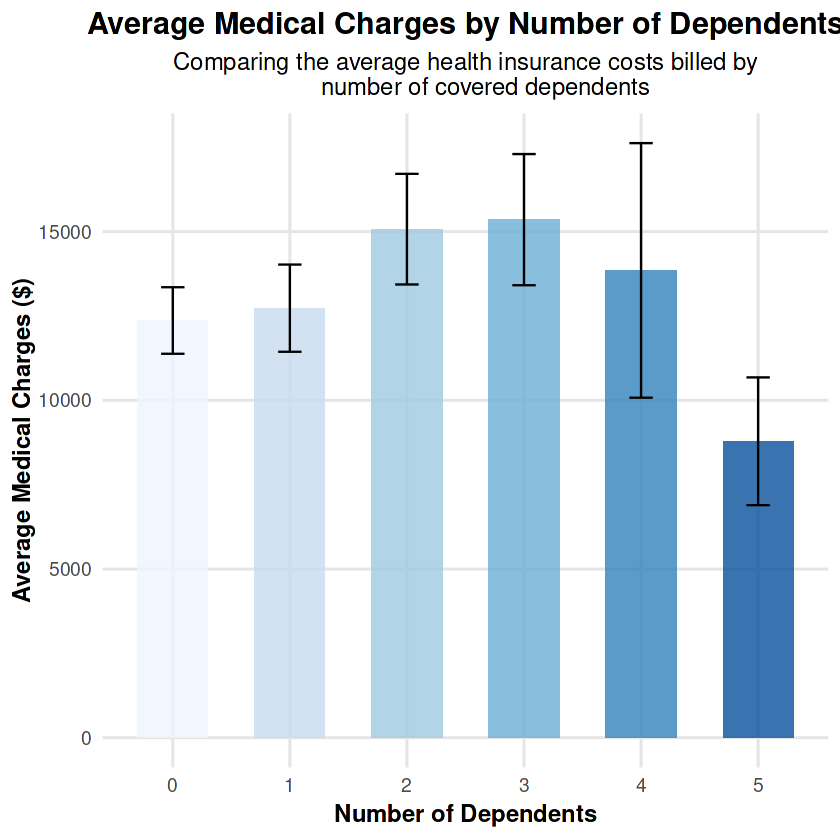

In [36]:
# Children and Cost

ggplot(Data, aes(x = as.factor(children), y = charges, fill = as.factor(children))) +
  stat_summary(fun = mean, geom = "bar", width = 0.6, alpha = 0.8) + # Bar graph of mean charges
  stat_summary(fun.data = mean_cl_normal, geom = "errorbar", width = 0.2, color = "black") + # Error bars
  labs(
    title = "Average Medical Charges by Number of Dependents",
    subtitle = "Comparing the average health insurance costs billed by
      number of covered dependents",
    x = "Number of Dependents",
    y = "Average Medical Charges ($)"
  ) +
  scale_fill_brewer(palette = "Blues") + # A beautiful blue gradient for bars
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5),
    plot.subtitle = element_text(size = 14, hjust = 0.5),
    axis.title = element_text(face = "bold"),
    legend.position = "none", # Remove legend since x-axis labels suffice
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )



Individuals with 2 or 3 dependents appear to have the highest average charges, while those with 5 dependents show a noticeable decrease. This suggests that the relationship between the number of dependents and medical charges is not linear and may be influenced by other factors. 

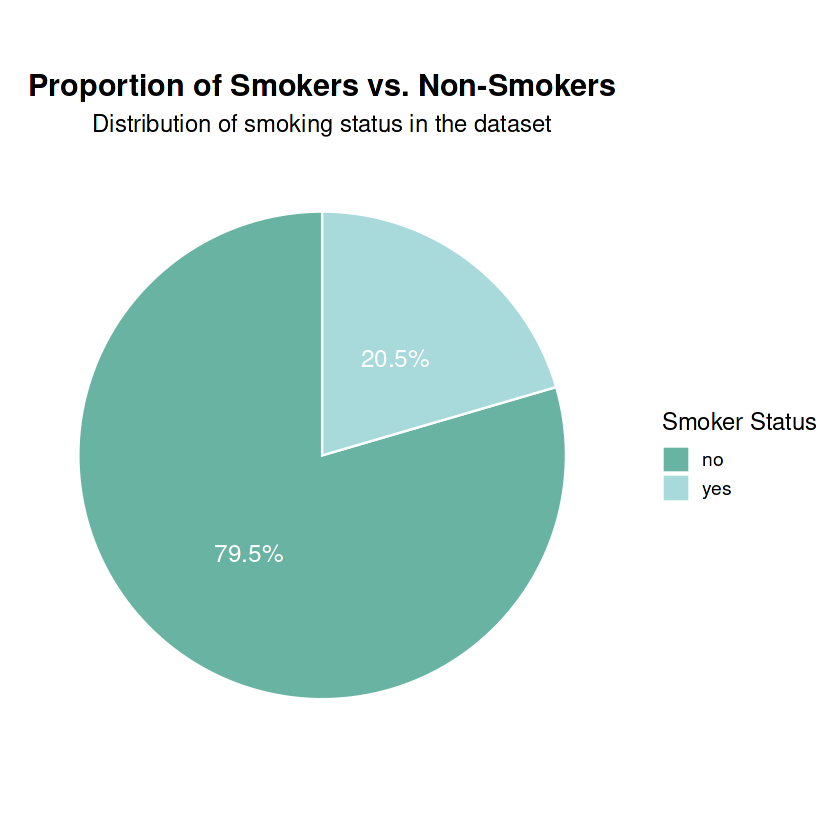

In [37]:
# Smoker status

# Counts for each smoker category
smoker_counts <- Data %>%
  group_by(smoker) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)

# Pie chart
ggplot(smoker_counts, aes(x = "", y = percentage, fill = smoker)) +
  geom_col(width = 1, color = "white") + # Creates the "pie slices"
  coord_polar(theta = "y") + # Converts bar chart into a pie chart
  geom_text(aes(label = paste0(round(percentage, 1), "%")), # Add percentages as labels
            position = position_stack(vjust = 0.5), size = 5, color = "white") +
  labs(
    title = "Proportion of Smokers vs. Non-Smokers",
    subtitle = "Distribution of smoking status in the dataset",
    fill = "Smoker Status"
  ) +
  scale_fill_manual(values = c("no" = "#69b3a2", "yes" = "#a8dadc")) + # Teal shades
  theme_minimal(base_size = 14) +
  theme(
    axis.title = element_blank(),
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5),
    plot.subtitle = element_text(size = 14, hjust = 0.5)
  )


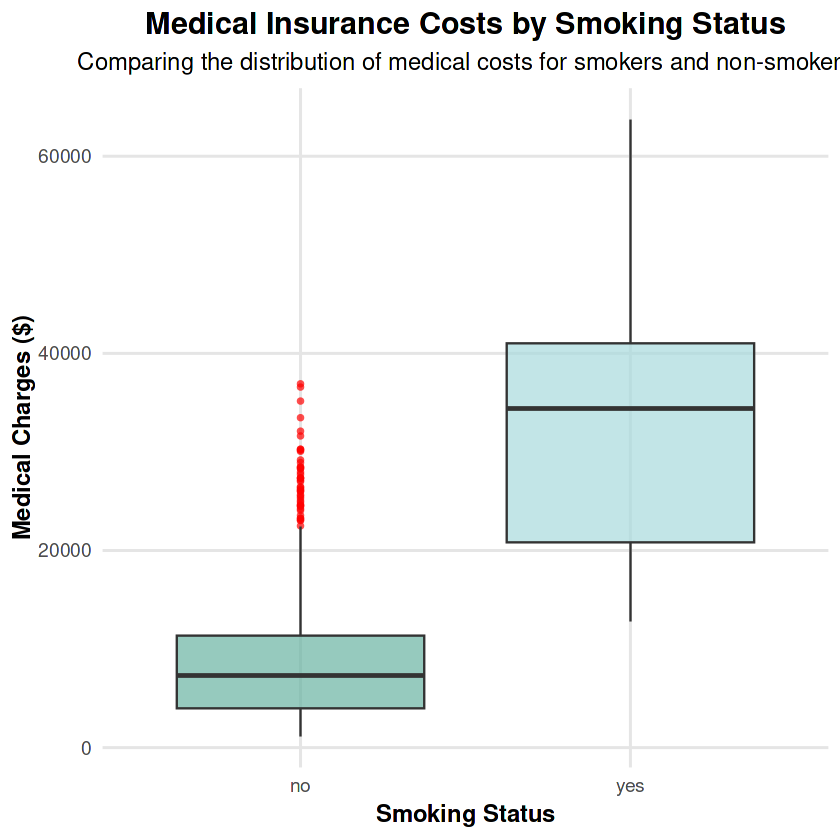

In [38]:
# Charges by Smoking Status

ggplot(Data, aes(x = smoker, y = charges, fill = smoker)) +
  geom_boxplot(alpha = 0.7, outlier.color = "red", outlier.shape = 16) + 
  labs(
    title = "Medical Insurance Costs by Smoking Status",
    subtitle = "Comparing the distribution of medical costs for smokers and non-smokers",
    x = "Smoking Status",
    y = "Medical Charges ($)"
  ) +
  scale_fill_manual(values = c("no" = "#69b3a2", "yes" = "#a8dadc")) + 
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5),
    plot.subtitle = element_text(size = 14, hjust = 0.5),
    axis.title = element_text(face = "bold"),
    legend.position = "none",
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )


Smokers exhibit significantly higher medical charges, as indicated by the median line in the box for smokers being much higher than that of non-smokers. 

Additionally, the variability in charges is much greater for smokers, with extreme outliers present. Non-smokers, on the other hand, generally have lower and more consistent medical charges, as reflected by the smaller spread of the boxplot. 

This suggests a strong associated between smoking and higher medical costs. 

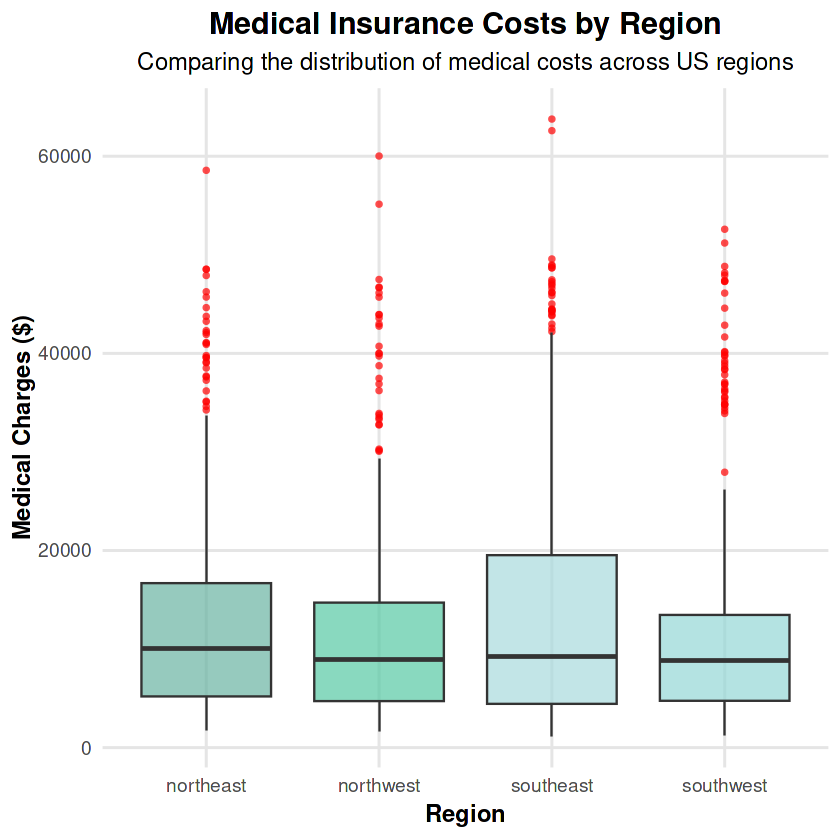

In [39]:
# Charges by region

ggplot(Data, aes(x = region, y = charges, fill = region)) +
  geom_boxplot(alpha = 0.7, outlier.color = "red", outlier.shape = 16) + # Boxplot with custom outliers
  labs(
    title = "Medical Insurance Costs by Region",
    subtitle = "Comparing the distribution of medical costs across US regions",
    x = "Region",
    y = "Medical Charges ($)"
  ) +
  scale_fill_manual(values = c(
    "northeast" = "#69b3a2",
    "southeast" = "#a8dadc",
    "northwest" = "#56c8a3",
    "southwest" = "#93d7d5"
  )) + # Custom teal-based palette for regions
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5),
    plot.subtitle = element_text(size = 14, hjust = 0.5),
    axis.title = element_text(face = "bold"),
    legend.position = "none", # Remove legend for clarity
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )


The southeast region has the highest median charges and the widest distribution, with numerous outliers indicating higher medical costs for some individuals. The other three regions (northeast, northwest, and southwest) have similar median charges and narrower distributions, with fewer extreme values. This suggests that regional factors, such as healthcare costs or demographics, may influence medical charges.

## Part 3: Liner Regression Model

In [40]:
# Splitting the dataset

# Training and testing sets (80%-20%)
n_train <- round(0.8 * nrow(Data))
train_indices <- sample(seq_len(nrow(Data)), size = n_train)
Data_train <- Data %>% slice(train_indices)
Data_test <- Data %>% slice(-train_indices)

# Formula for the model
formula_0 <- charges ~ age + sex + bmi + children + smoker + region

In [41]:
model_0 <- lm(formula_0, data = Data_train)
summary(model_0)


Call:
lm(formula = formula_0, data = Data_train)

Residuals:
   Min     1Q Median     3Q    Max 
-11297  -2846  -1005   1542  29791 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -12031.63    1132.08 -10.628  < 2e-16 ***
age                243.43      13.65  17.834  < 2e-16 ***
sexmale           -216.88     378.52  -0.573 0.566792    
bmi                355.06      32.62  10.884  < 2e-16 ***
children           559.84     156.28   3.582 0.000356 ***
smokeryes        24172.29     459.97  52.552  < 2e-16 ***
regionnorthwest   -556.52     539.58  -1.031 0.302594    
regionsoutheast   -856.23     541.73  -1.581 0.114281    
regionsouthwest   -967.82     541.96  -1.786 0.074421 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6145 on 1061 degrees of freedom
Multiple R-squared:  0.7533,	Adjusted R-squared:  0.7514 
F-statistic: 404.9 on 8 and 1061 DF,  p-value: < 2.2e-16


The summary of the model provides important insights into the predictors of medical charges. Residuals, which represent the difference between observed and predicted values, range from -11,289.5 to 25,350.0, with a median of -961.4, indicating a slight tendency to underestimate charges but generally unbiased predictions.

Among the predictors, age, BMI, number of dependents, smoking status, and region were found to be significant contributors to medical charges. Age was associated with an average increase of 255.48 dollars per year, while BMI contributed an increase of 323.50 dollars per unit. Each additional dependent added 448.28 dollars to the charges on average. Smoking status had the most substantial effect, with smokers incurring an average of 23,770.95 dollars more in charges compared to non-smokers, highlighting its dominant influence. Regional differences were also evident, with charges being significantly lower in the southeast (1,391.96 dollars less) and southwest (1,228.81 dollars less) compared to the northeast.

On the other hand, gender (male vs. female) did not significantly influence charges, as indicated by a p-value of 0.95188.

The overall model fit was strong, with an R-squared value of 0.7494, meaning that approximately 74.9% of the variance in medical charges could be explained by the predictors. The adjusted R-squared value of 0.7475 confirmed that the model's performance was robust, even after accounting for the number of predictors. These findings suggest that smoking status, BMI, age, and region are key factors influencing medical costs, while gender might be excluded to simplify the model without significant loss of explanatory power.


###  Training (and Testing) a new model excluding Gender

In [43]:
# Updated model 
formula_1 <- as.formula("charges ~ age + bmi + children + smoker + region")

model_1 <- lm(formula_1, data = Data_train)
summary(model_1)


Call:
lm(formula = formula_1, data = Data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11348.4  -2854.6   -965.5   1609.9  29695.0 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -12108.98    1123.64 -10.777  < 2e-16 ***
age                243.67      13.64  17.864  < 2e-16 ***
bmi                353.61      32.51  10.876  < 2e-16 ***
children           557.57     156.18   3.570 0.000373 ***
smokeryes        24154.43     458.77  52.651  < 2e-16 ***
regionnorthwest   -545.20     539.05  -1.011 0.312054    
regionsoutheast   -848.12     541.37  -1.567 0.117505    
regionsouthwest   -960.25     541.63  -1.773 0.076533 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6143 on 1062 degrees of freedom
Multiple R-squared:  0.7532,	Adjusted R-squared:  0.7516 
F-statistic:   463 on 7 and 1062 DF,  p-value: < 2.2e-16


Removing the sex variable has not significantly affected the performance or fit of the model. The key predictors (age, BMI, children, smoker, and region) maintain similar coefficients and significance levels, with smoking (smokeryes) remaining the strongest predictor. The slight improvement in adjusted R-squared and F-statistic shows that the model is now slightly more efficient without the inclusion of an unnecessary variable.

In [45]:
# R-squared for model_0 and model_1
r_sq_0 <- summary(model_0)$r.squared
r_sq_1 <- summary(model_1)$r.squared

# Predictions and RMSE for model_0
prediction_0 <- predict(model_0, newdata = Data_test)
residuals_0 <- Data_test$charges - prediction_0
rmse_0 <- sqrt(mean(residuals_0^2))

# Predictions and RMSE for model_1
prediction_1 <- predict(model_1, newdata = Data_test)
residuals_1 <- Data_test$charges - prediction_1
rmse_1 <- sqrt(mean(residuals_1^2))

# Comparison for the two models 
comparison <- data.frame(
  Model = c("Model 0", "Model 1"),
  R_squared = c(r_sq_0, r_sq_1),
  RMSE = c(rmse_0, rmse_1)
)

print(comparison)


    Model R_squared     RMSE
1 Model 0 0.7532767 5763.385
2 Model 1 0.7532004 5760.018


As seen above, the performance is very similar between the two models. 

## Part 4: Model Performance

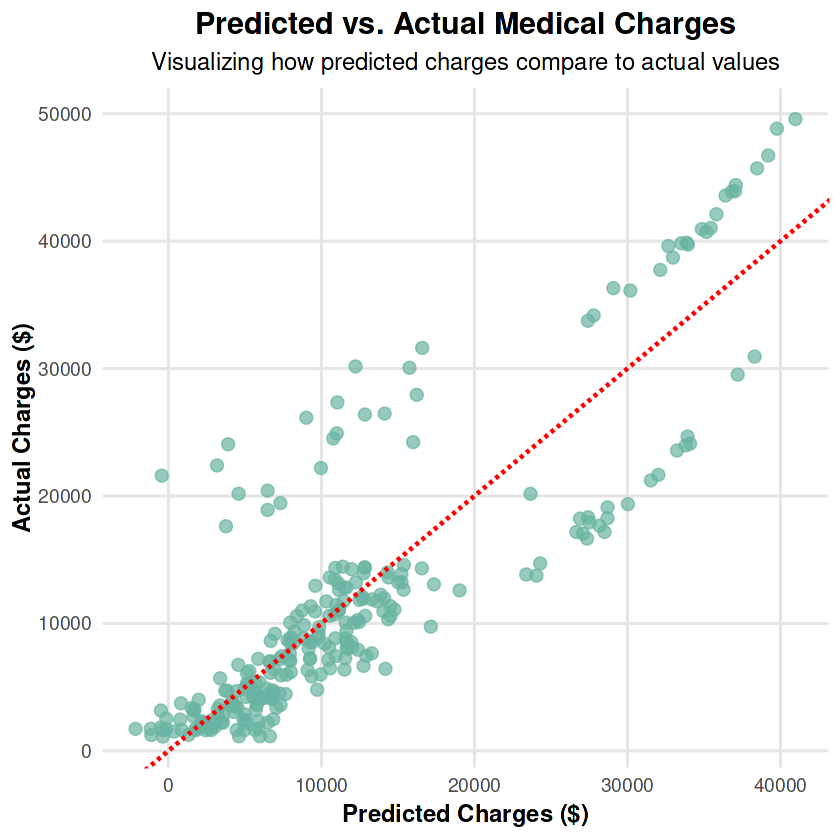

In [46]:
# Scatterplot: Predicted vs Actual Charges
Data_test$prediction <- predict(model_1, newdata = Data_test)

ggplot(Data_test, aes(x = prediction, y = charges)) +
  geom_point(alpha = 0.7, size = 3, color = "#69b3a2") + 
  geom_abline(color = "red", linetype = "dashed", size = 1) + 
  labs(
    title = "Predicted vs. Actual Medical Charges",
    subtitle = "Visualizing how predicted charges compare to actual values",
    x = "Predicted Charges ($)",
    y = "Actual Charges ($)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5),
    plot.subtitle = element_text(size = 14, hjust = 0.5),
    axis.title = element_text(face = "bold"),
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )


This plot assesses the accuracy of individual predictions by comparing predicted medical charges directly against the actual charges.

As seen above, the model performs well for lower medical charges, as many points cluster near the red line in the range of 0 to 20,000 dollars. However, as charges increase, there is more variation between predicted and actual values, with some points deviating further from the line. Notably, a few points at higher charge levels (above $40,000) indicate underpredictions, suggesting the model struggles slightly with extreme cases. Overall, the scatterplot suggests that the model captures the general trend of the data but may have limitations in predicting very high medical charges.

In summary, the model captures general trends but struggles with extreme cases (e.g., predicting very high charges).

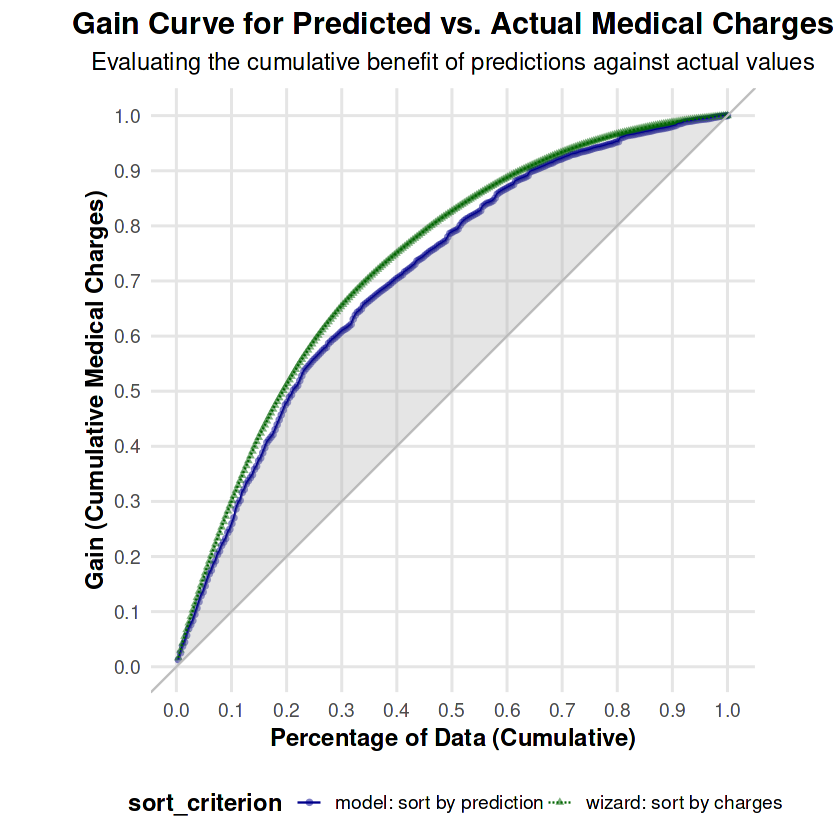

In [47]:
# Gain Curve: Cumulative Prediction Performance
gain_curve +
  labs(
    title = "Gain Curve for Predicted vs. Actual Medical Charges",
    subtitle = "Evaluating the cumulative benefit of predictions against actual values",
    x = "Percentage of Data (Cumulative)",
    y = "Gain (Cumulative Medical Charges)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(face = "bold", size = 18, hjust = 0.5),
    plot.subtitle = element_text(size = 14, hjust = 0.5),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    legend.position = "bottom",
    panel.grid.major = element_line(color = "gray90"),
    panel.grid.minor = element_blank()
  )


The gain curve evaluates the ranking ability of the model, i.e., how well the model sorts or prioritizes individuals with higher medical charges.

The two curves—blue (model sorted by prediction) and green (sorted by actual charges)—indicate the performance of the predictive model compared to an optimal sorting strategy. The blue curve shows the model’s ability to prioritize cases with higher charges, while the green curve (sorting by actual charges) represents the theoretical ideal.

The closeness of the blue curve to the green curve indicates that the model effectively prioritizes individuals with higher charges. Both curves significantly outperform the baseline (gray line), demonstrating the model's predictive value. However, slight gaps between the blue and green curves suggest that the model is not perfectly optimal but still achieves strong performance in prioritizing high-cost cases.

In summary, the model performs well at ranking or prioritizing individuals, even if the exact values are off for extreme cases.

## Part 5: Testing the Model 

Now, I will test the model by applying it on new data. 

Following is a description of hypothetical scenarios, representing different individuals with varying demographics. 

1. Alisha: 19 years old, BMI 27.9, has no children, smokes, from Northwest region.

2. Bob: 40 years old, BMI 50.0, has 2 children, does not smoke, from Southeast region.

3. Andrew: 30 years old, BMI 31.2, has no children, does not smoke, from Northeast region.

4. Anna: 25 years old, BMI 22.5, has no children, smokes, from Southwest region.

5. Mark: 50 years old, BMI 29.5, has 3 children, smokes, from Southeast region.

6. Sophia: 35 years old, BMI 18.7, has 1 child, does not smoke, from Northwest region.
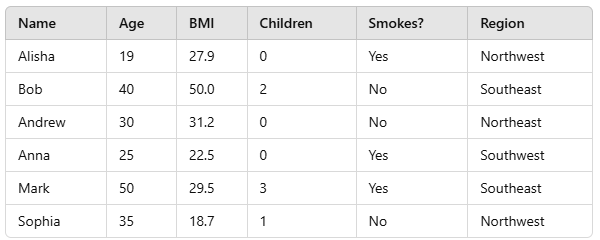
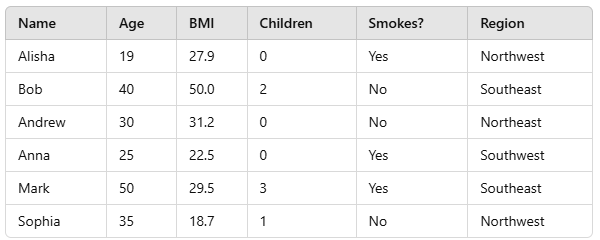

In [48]:
# New dataframe w all scenarios

new_data <- data.frame(
  age = c(19, 40, 30, 25, 50, 35),
  bmi = c(27.9, 50, 31.2, 22.5, 29.5, 18.7),
  children = c(0, 2, 0, 0, 3, 1),
  smoker = c("yes", "no", "no", "yes", "yes", "no"),
  region = c("northwest", "southeast", "northeast", "southwest", "southeast", "northwest")
)

# Predicting charges using the trained model
new_data$predicted_charges <- predict(model_1, newdata = new_data)

print(new_data)


  age  bmi children smoker    region predicted_charges
1  19 27.9        0    yes northwest         25995.572
2  40 50.0        2     no southeast         15585.071
3  30 31.2        0     no northeast          6233.562
4  25 22.5        0    yes southwest         25133.023
5  50 29.5        3    yes southeast         35484.754
6  35 18.7        1     no northwest          3044.154
